<center><H1>Persebaran COVID-19 di Indonesia

<H2>Import library yang dibutuhkan

In [1]:
import urllib.request
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import six

<h2> Ambil API Data COVID-19 setiap Provinsi di Indonesia

In [2]:
url_provinsi = "https://indonesia-covid-19.mathdro.id/api/provinsi"
respon_provinsi = urllib.request.urlopen(url_provinsi)
data_provinsi = json.loads(respon_provinsi.read())
data_provinsi = data_provinsi["data"]
data_provinsi

[{'fid': 11,
  'kodeProvi': 31,
  'provinsi': 'DKI Jakarta',
  'kasusPosi': 67902,
  'kasusSemb': 54268,
  'kasusMeni': 1661},
 {'fid': 15,
  'kodeProvi': 35,
  'provinsi': 'Jawa Timur',
  'kasusPosi': 42391,
  'kasusSemb': 35205,
  'kasusMeni': 3084},
 {'fid': 13,
  'kodeProvi': 33,
  'provinsi': 'Jawa Tengah',
  'kasusPosi': 21004,
  'kasusSemb': 15043,
  'kasusMeni': 1372},
 {'fid': 12,
  'kodeProvi': 32,
  'provinsi': 'Jawa Barat',
  'kasusPosi': 20131,
  'kasusSemb': 12022,
  'kasusMeni': 368},
 {'fid': 27,
  'kodeProvi': 73,
  'provinsi': 'Sulawesi Selatan',
  'kasusPosi': 14982,
  'kasusSemb': 10961,
  'kasusMeni': 406},
 {'fid': 22,
  'kodeProvi': 63,
  'provinsi': 'Kalimantan Selatan',
  'kasusPosi': 10080,
  'kasusSemb': 8503,
  'kasusMeni': 410},
 {'fid': 2,
  'kodeProvi': 12,
  'provinsi': 'Sumatera Utara',
  'kasusPosi': 9843,
  'kasusSemb': 6107,
  'kasusMeni': 415},
 {'fid': 17,
  'kodeProvi': 51,
  'provinsi': 'Bali',
  'kasusPosi': 8389,
  'kasusSemb': 6828,
  'kasusMe

<H2> Sajikan dalam DataFrame

In [3]:
df_provinsi = pd.DataFrame(data_provinsi)
df_provinsi.head()

,fid,kodeProvi,provinsi,kasusPosi,kasusSemb,kasusMeni
0,11,31,DKI Jakarta,67902,54268,1661
1,15,35,Jawa Timur,42391,35205,3084
2,13,33,Jawa Tengah,21004,15043,1372
3,12,32,Jawa Barat,20131,12022,368
4,27,73,Sulawesi Selatan,14982,10961,406


# Membaca Shape File dengan GeoPandas

Gunakan file `idn_admbnda_adm1_bps_20200401.shp` untuk mengambil data batas wilayah setiap provinsi di Indonesia

sumber data :  https://data.humdata.org/dataset/indonesia-administrative-boundary-polygons-lines-and-places-levels-0-4b

In [4]:
fp = "../geopandas/idn_admbnda_adm1_bps_20200401.shp"
map_df = gpd.read_file(fp)

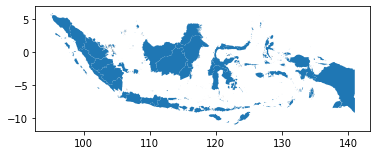

In [5]:
map_df.plot()

In [6]:
map_df.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."


## Penyesuaian data

Nama DKI Jakarta pada `df_provinsi` dan `map_df` tidak sama

In [8]:
map_df = map_df.replace("Dki Jakarta","DKI Jakarta")
map_df[map_df['ADM1_EN'] == "DKI Jakarta"]

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
5,3.123689,0.053426,DKI Jakarta,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ..."


## Gabungkan data
kesamaan : `map_df` -> ADM1_EN sedangkan pada `df_provinsi` -> provinsi

In [9]:
merged = map_df.set_index('ADM1_EN').join(df_provinsi.set_index('provinsi'))
merged

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,fid,kodeProvi,kasusPosi,kasusSemb,kasusMeni
ADM1_EN,,,,,,,,,,,,,,,,,
Aceh,27.367364,4.625437,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0...",1,11,3982,1889,147
Bali,6.026648,0.458717,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ...",17,51,8389,6828,245
Banten,9.279900,0.764911,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",16,36,5050,3218,162
Bengkulu,11.653771,1.630129,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ...",7,17,590,379,32
Daerah Istimewa Yogyakarta,3.341561,0.260130,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ...",14,34,2458,1677,64
DKI Jakarta,3.123689,0.053426,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ...",11,31,67902,54268,1661
Gorontalo,11.013243,0.977600,ID75,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((121.42536 0.41243, 121.42355 0...",29,75,2534,2199,75
Jambi,11.835073,3.977711,ID15,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ...",5,15,409,263,8
Jawa Barat,11.605868,3.032785,ID32,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ...",12,32,20131,12022,368


In [10]:
v_positif = 'kasusPosi'
vmin_positif = merged['kasusPosi'].min()
vmax_positif = merged['kasusPosi'].max()

v_sembuh = 'kasusSemb'
vmin_sembuh = merged['kasusSemb'].min()
vmax_sembuh = merged['kasusSemb'].max()

v_meninggal = 'kasusMeni'
vmin_meninggal = merged['kasusMeni'].min()
vmax_meninggal = merged['kasusMeni'].max()


print('Nilai minimumnya adalah {}, sedangkan nilai maksimumnya adalah {}'.format(vmin_positif,vmax_positif))
print('Nilai minimumnya adalah {}, sedangkan nilai maksimumnya adalah {}'.format(vmin_sembuh,vmax_sembuh))
print('Nilai minimumnya adalah {}, sedangkan nilai maksimumnya adalah {}'.format(vmin_meninggal,vmax_meninggal))

Nilai minimumnya adalah 191, sedangkan nilai maksimumnya adalah 67902
Nilai minimumnya adalah 173, sedangkan nilai maksimumnya adalah 54268
Nilai minimumnya adalah 2, sedangkan nilai maksimumnya adalah 3084


## Mapping Kasus

- Terkonfirmasi

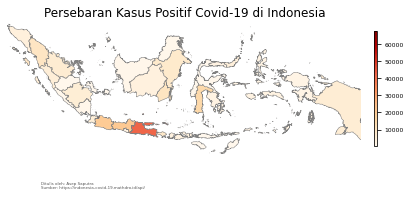

In [11]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 1, 1])
ax.axis('off')
fig1.set_facecolor("#ffffff")
fig1.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig1.transFigure)
w,h = fig1.get_size_inches()
fig1.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=v_positif, cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig1.colorbar(plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin_positif, vmax=vmax_positif)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('Persebaran Kasus Positif Covid-19 di Indonesia', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})
ax.annotate('Ditulis oleh: Asep Saputra\nSumber: https://indonesia-covid-19.mathdro.id/api/',
           xy=(0.1, .1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='bottom',
           fontsize=4, color='#555555');

- Sembuh

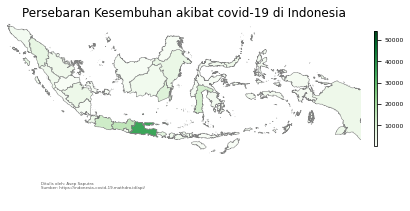

In [12]:
fig2 = plt.figure()
ax = fig2.add_axes([0, 0, 1, 1])
ax.axis('off')
fig2.set_facecolor("#ffffff")
fig2.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig2.transFigure)
w,h = fig2.get_size_inches()
fig2.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=v_sembuh, cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig2.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin_sembuh, vmax=vmax_sembuh)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('Persebaran Kesembuhan akibat covid-19 di Indonesia', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})
ax.annotate('Ditulis oleh: Asep Saputra\nSumber: https://indonesia-covid-19.mathdro.id/api/',
           xy=(0.1, .1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='bottom',
           fontsize=4, color='#555555');

- Meninggal

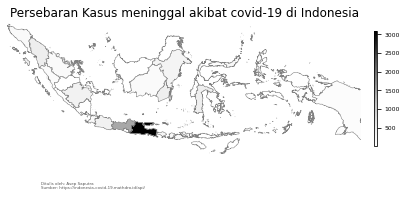

In [13]:
fig3 = plt.figure()
ax = fig3.add_axes([0, 0, 1, 1])
ax.axis('off')
fig3.set_facecolor("#ffffff")
fig3.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig3.transFigure)
w,h = fig3.get_size_inches()
fig3.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=v_meninggal, cmap='Greys', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig3.colorbar(plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin_meninggal, vmax=vmax_meninggal)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('Persebaran Kasus meninggal akibat covid-19 di Indonesia', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})
ax.annotate('Ditulis oleh: Asep Saputra\nSumber: https://indonesia-covid-19.mathdro.id/api/',
           xy=(0.1, .1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='bottom',
           fontsize=4, color='#555555');

## Simpan file

In [14]:
fig1.savefig('terkonfirmasi.png', dpi=1080)
fig2.savefig('meninggal.png', dpi=1080)
fig3.savefig('sembuh.png', dpi=1080)